## Objective

Comparative study of KNN and Decision tree for predicting Students Adaptability level in Online Education.

### Import libraries

In [47]:
import pandas as pd
from ydata_profiling import ProfileReport
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Ignoring all warnings
warnings.filterwarnings("ignore")

### Read Data

In [48]:
df = pd.read_csv('students_adaptability_level_online_education.csv')

In [49]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [50]:
df.shape

(1205, 14)

### Generate Data Profiling Report

In [51]:
# Creating the profiling report
profile = ProfileReport(df, title="Profiling Report", explorative=True)
# Displaying the report in a Jupyter Notebook (optional)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

As we can see, data needs to be cleaned as it has 246 duplicate rows

In [52]:
df_unique = df.drop_duplicates()
#Reseting index
df_unique.reset_index(drop=True, inplace=True)

In [53]:
df_unique.duplicated().sum()

0

# Encoding

Choose a suitable encoding technique for the columns.

In [54]:
# Check the unique values in the ordinal columns
unique_ages = df_unique['Age'].unique()
unique_financial_conditions = df_unique['Financial Condition'].unique()
unique_class_durations = df_unique['Class Duration'].unique()
unique_adaptivity_levels = df_unique['Adaptivity Level'].unique()

(unique_ages, unique_financial_conditions, unique_class_durations, unique_adaptivity_levels)

(array(['21-25', '16-20', '11-15', '26-30', '6-10', '1-5'], dtype=object),
 array(['Mid', 'Poor', 'Rich'], dtype=object),
 array(['3-6', '1-3', '0'], dtype=object),
 array(['Moderate', 'Low', 'High'], dtype=object))

In [55]:
#Age feature will be ordinally encoded as it depicts meaningful order
ordinal_mapping = {'1-5': 1, '6-10': 2, '11-15': 3,'16-20':4,'21-25':5,'26-30':6}
df_unique['Age_Ordinal'] = df_unique['Age'].map(ordinal_mapping)
df_unique.drop(columns=['Age'], inplace=True)
df_unique

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,Age_Ordinal
0,Boy,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate,5
1,Girl,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate,5
2,Girl,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate,4
3,Girl,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate,3
4,Girl,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Boy,University,Non Government,Yes,No,High,Mid,Mobile Data,3G,3-6,No,Computer,Low,5
252,Boy,College,Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate,4
253,Girl,College,Non Government,No,No,Low,Mid,Mobile Data,3G,1-3,Yes,Mobile,Low,4
254,Boy,University,Non Government,Yes,No,High,Mid,Mobile Data,3G,1-3,Yes,Mobile,Moderate,5


In [56]:
#Adaptivity label will be ordinally encoded as it depicts meaningful order
ordinal_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
df_unique['Adaptivity_Level_Ordinal'] = df_unique['Adaptivity Level'].map(ordinal_mapping)
df_unique.drop(columns=['Adaptivity Level'], inplace=True) #inplace Changes the original df
df_unique

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Age_Ordinal,Adaptivity_Level_Ordinal
0,Boy,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,5,2
1,Girl,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,5,2
2,Girl,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,4,2
3,Girl,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,3,2
4,Girl,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Boy,University,Non Government,Yes,No,High,Mid,Mobile Data,3G,3-6,No,Computer,5,1
252,Boy,College,Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,4,2
253,Girl,College,Non Government,No,No,Low,Mid,Mobile Data,3G,1-3,Yes,Mobile,4,1
254,Boy,University,Non Government,Yes,No,High,Mid,Mobile Data,3G,1-3,Yes,Mobile,5,2


In [57]:
#Education Level will be ordinally encoded as it depicts meaningful order
ordinal_mapping = {'School': 1, 'College': 2, 'University': 3}
df_unique['Education_Level_Ordinal'] = df_unique['Education Level'].map(ordinal_mapping)
df_unique.drop(columns=['Education Level'], inplace=True) #inplace Changes the original df
df_unique

,Gender,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Age_Ordinal,Adaptivity_Level_Ordinal,Education_Level_Ordinal
0,Boy,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,5,2,3
1,Girl,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,5,2,3
2,Girl,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,4,2,2
3,Girl,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,3,2,1
4,Girl,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Boy,Non Government,Yes,No,High,Mid,Mobile Data,3G,3-6,No,Computer,5,1,3
252,Boy,Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,4,2,2
253,Girl,Non Government,No,No,Low,Mid,Mobile Data,3G,1-3,Yes,Mobile,4,1,2
254,Boy,Non Government,Yes,No,High,Mid,Mobile Data,3G,1-3,Yes,Mobile,5,2,3


In [58]:
#Load-shedding will be ordinally encoded as it depicts meaningful order
ordinal_mapping = {'Low': 1,  'High': 2}
df_unique['Load-shedding_Ordinal'] = df_unique['Load-shedding'].map(ordinal_mapping)
df_unique.drop(columns=['Load-shedding'], inplace=True) #inplace Changes the original df
df_unique

,Gender,Institution Type,IT Student,Location,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Age_Ordinal,Adaptivity_Level_Ordinal,Education_Level_Ordinal,Load-shedding_Ordinal
0,Boy,Non Government,No,Yes,Mid,Wifi,4G,3-6,No,Tab,5,2,3,1
1,Girl,Non Government,No,Yes,Mid,Mobile Data,4G,1-3,Yes,Mobile,5,2,3,2
2,Girl,Government,No,Yes,Mid,Wifi,4G,1-3,No,Mobile,4,2,2,1
3,Girl,Non Government,No,Yes,Mid,Mobile Data,4G,1-3,No,Mobile,3,2,1,1
4,Girl,Non Government,No,Yes,Poor,Mobile Data,3G,0,No,Mobile,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Boy,Non Government,Yes,No,Mid,Mobile Data,3G,3-6,No,Computer,5,1,3,2
252,Boy,Government,No,Yes,Mid,Mobile Data,3G,1-3,No,Mobile,4,2,2,1
253,Girl,Non Government,No,No,Mid,Mobile Data,3G,1-3,Yes,Mobile,4,1,2,1
254,Boy,Non Government,Yes,No,Mid,Mobile Data,3G,1-3,Yes,Mobile,5,2,3,2


In [59]:
#Financial Condition will be ordinally encoded as it depicts meaningful order
ordinal_mapping = {'Poor': 1, 'Mid': 2, 'Rich': 3}
df_unique['Financial_Condition_Ordinal'] = df_unique['Financial Condition'].map(ordinal_mapping)
df_unique.drop(columns=['Financial Condition'], inplace=True) #inplace Changes the original df
df_unique

,Gender,Institution Type,IT Student,Location,Internet Type,Network Type,Class Duration,Self Lms,Device,Age_Ordinal,Adaptivity_Level_Ordinal,Education_Level_Ordinal,Load-shedding_Ordinal,Financial_Condition_Ordinal
0,Boy,Non Government,No,Yes,Wifi,4G,3-6,No,Tab,5,2,3,1,2
1,Girl,Non Government,No,Yes,Mobile Data,4G,1-3,Yes,Mobile,5,2,3,2,2
2,Girl,Government,No,Yes,Wifi,4G,1-3,No,Mobile,4,2,2,1,2
3,Girl,Non Government,No,Yes,Mobile Data,4G,1-3,No,Mobile,3,2,1,1,2
4,Girl,Non Government,No,Yes,Mobile Data,3G,0,No,Mobile,4,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Boy,Non Government,Yes,No,Mobile Data,3G,3-6,No,Computer,5,1,3,2,2
252,Boy,Government,No,Yes,Mobile Data,3G,1-3,No,Mobile,4,2,2,1,2
253,Girl,Non Government,No,No,Mobile Data,3G,1-3,Yes,Mobile,4,1,2,1,2
254,Boy,Non Government,Yes,No,Mobile Data,3G,1-3,Yes,Mobile,5,2,3,2,2


In [60]:
#Financial Condition will be ordinally encoded as it depicts meaningful order
ordinal_mapping = {'0': 1, '1-3': 2, '3-6': 3}
df_unique['Class_Duration_Ordinal'] = df_unique['Class Duration'].map(ordinal_mapping)
df_unique.drop(columns=['Class Duration'], inplace=True) #inplace Changes the original df
df_unique

,Gender,Institution Type,IT Student,Location,Internet Type,Network Type,Self Lms,Device,Age_Ordinal,Adaptivity_Level_Ordinal,Education_Level_Ordinal,Load-shedding_Ordinal,Financial_Condition_Ordinal,Class_Duration_Ordinal
0,Boy,Non Government,No,Yes,Wifi,4G,No,Tab,5,2,3,1,2,3
1,Girl,Non Government,No,Yes,Mobile Data,4G,Yes,Mobile,5,2,3,2,2,2
2,Girl,Government,No,Yes,Wifi,4G,No,Mobile,4,2,2,1,2,2
3,Girl,Non Government,No,Yes,Mobile Data,4G,No,Mobile,3,2,1,1,2,2
4,Girl,Non Government,No,Yes,Mobile Data,3G,No,Mobile,4,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Boy,Non Government,Yes,No,Mobile Data,3G,No,Computer,5,1,3,2,2,3
252,Boy,Government,No,Yes,Mobile Data,3G,No,Mobile,4,2,2,1,2,2
253,Girl,Non Government,No,No,Mobile Data,3G,Yes,Mobile,4,1,2,1,2,2
254,Boy,Non Government,Yes,No,Mobile Data,3G,Yes,Mobile,5,2,3,2,2,2


In [61]:
# Binary encode multiple columns
df_unique = pd.get_dummies(df_unique, columns=['Institution Type', 'Location', 'IT Student', 'Self Lms', 'Gender'], drop_first=True)
df_unique

,Internet Type,Network Type,Device,Age_Ordinal,Adaptivity_Level_Ordinal,Education_Level_Ordinal,Load-shedding_Ordinal,Financial_Condition_Ordinal,Class_Duration_Ordinal,Institution Type_Non Government,Location_Yes,IT Student_Yes,Self Lms_Yes,Gender_Girl
0,Wifi,4G,Tab,5,2,3,1,2,3,True,True,False,False,False
1,Mobile Data,4G,Mobile,5,2,3,2,2,2,True,True,False,True,True
2,Wifi,4G,Mobile,4,2,2,1,2,2,False,True,False,False,True
3,Mobile Data,4G,Mobile,3,2,1,1,2,2,True,True,False,False,True
4,Mobile Data,3G,Mobile,4,1,1,1,1,1,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Mobile Data,3G,Computer,5,1,3,2,2,3,True,False,True,False,False
252,Mobile Data,3G,Mobile,4,2,2,1,2,2,False,True,False,False,False
253,Mobile Data,3G,Mobile,4,1,2,1,2,2,True,False,False,True,True
254,Mobile Data,3G,Mobile,5,2,3,2,2,2,True,False,True,True,False


In [62]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = [ 'Internet Type', 'Network Type', 'Device']
# Applying One-Hot Encoding to the selected categorical columns from 'df'
encoder = OneHotEncoder()
encoded_categorical_cols = encoder.fit_transform(df_unique[cat_cols]).toarray()
encoded_col_names = encoder.get_feature_names_out(cat_cols)

# Adding encoded features to the DataFrame from 'df_unique'
df_encoded = df_unique.join(pd.DataFrame(encoded_categorical_cols, columns=encoded_col_names))
# Dropping original categorical columns from 'df_encoded'
df_encoded = df_encoded.drop(cat_cols, axis=1)
df_encoded

,Age_Ordinal,Adaptivity_Level_Ordinal,Education_Level_Ordinal,Load-shedding_Ordinal,Financial_Condition_Ordinal,Class_Duration_Ordinal,Institution Type_Non Government,Location_Yes,IT Student_Yes,Self Lms_Yes,Gender_Girl,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Device_Computer,Device_Mobile,Device_Tab
0,5,2,3,1,2,3,True,True,False,False,False,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,5,2,3,2,2,2,True,True,False,True,True,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,4,2,2,1,2,2,False,True,False,False,True,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,2,1,1,2,2,True,True,False,False,True,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,4,1,1,1,1,1,True,True,False,False,True,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,5,1,3,2,2,3,True,False,True,False,False,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
252,4,2,2,1,2,2,False,True,False,False,False,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
253,4,1,2,1,2,2,True,False,False,True,True,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
254,5,2,3,2,2,2,True,False,True,True,False,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Check distribution

In [63]:
df_encoded.describe()

,Age_Ordinal,Adaptivity_Level_Ordinal,Education_Level_Ordinal,Load-shedding_Ordinal,Financial_Condition_Ordinal,Class_Duration_Ordinal,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Device_Computer,Device_Mobile,Device_Tab
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,4.144531,1.648438,2.152344,1.210938,1.902344,2.042969,0.539062,0.460938,0.027344,0.343750,0.628906,0.167969,0.808594,0.023438
std,1.157503,0.645829,0.879078,0.408773,0.526023,0.602372,0.499448,0.499448,0.163402,0.475889,0.484044,0.374571,0.394179,0.151585
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,5.000000,2.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,6.000000,3.000000,3.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


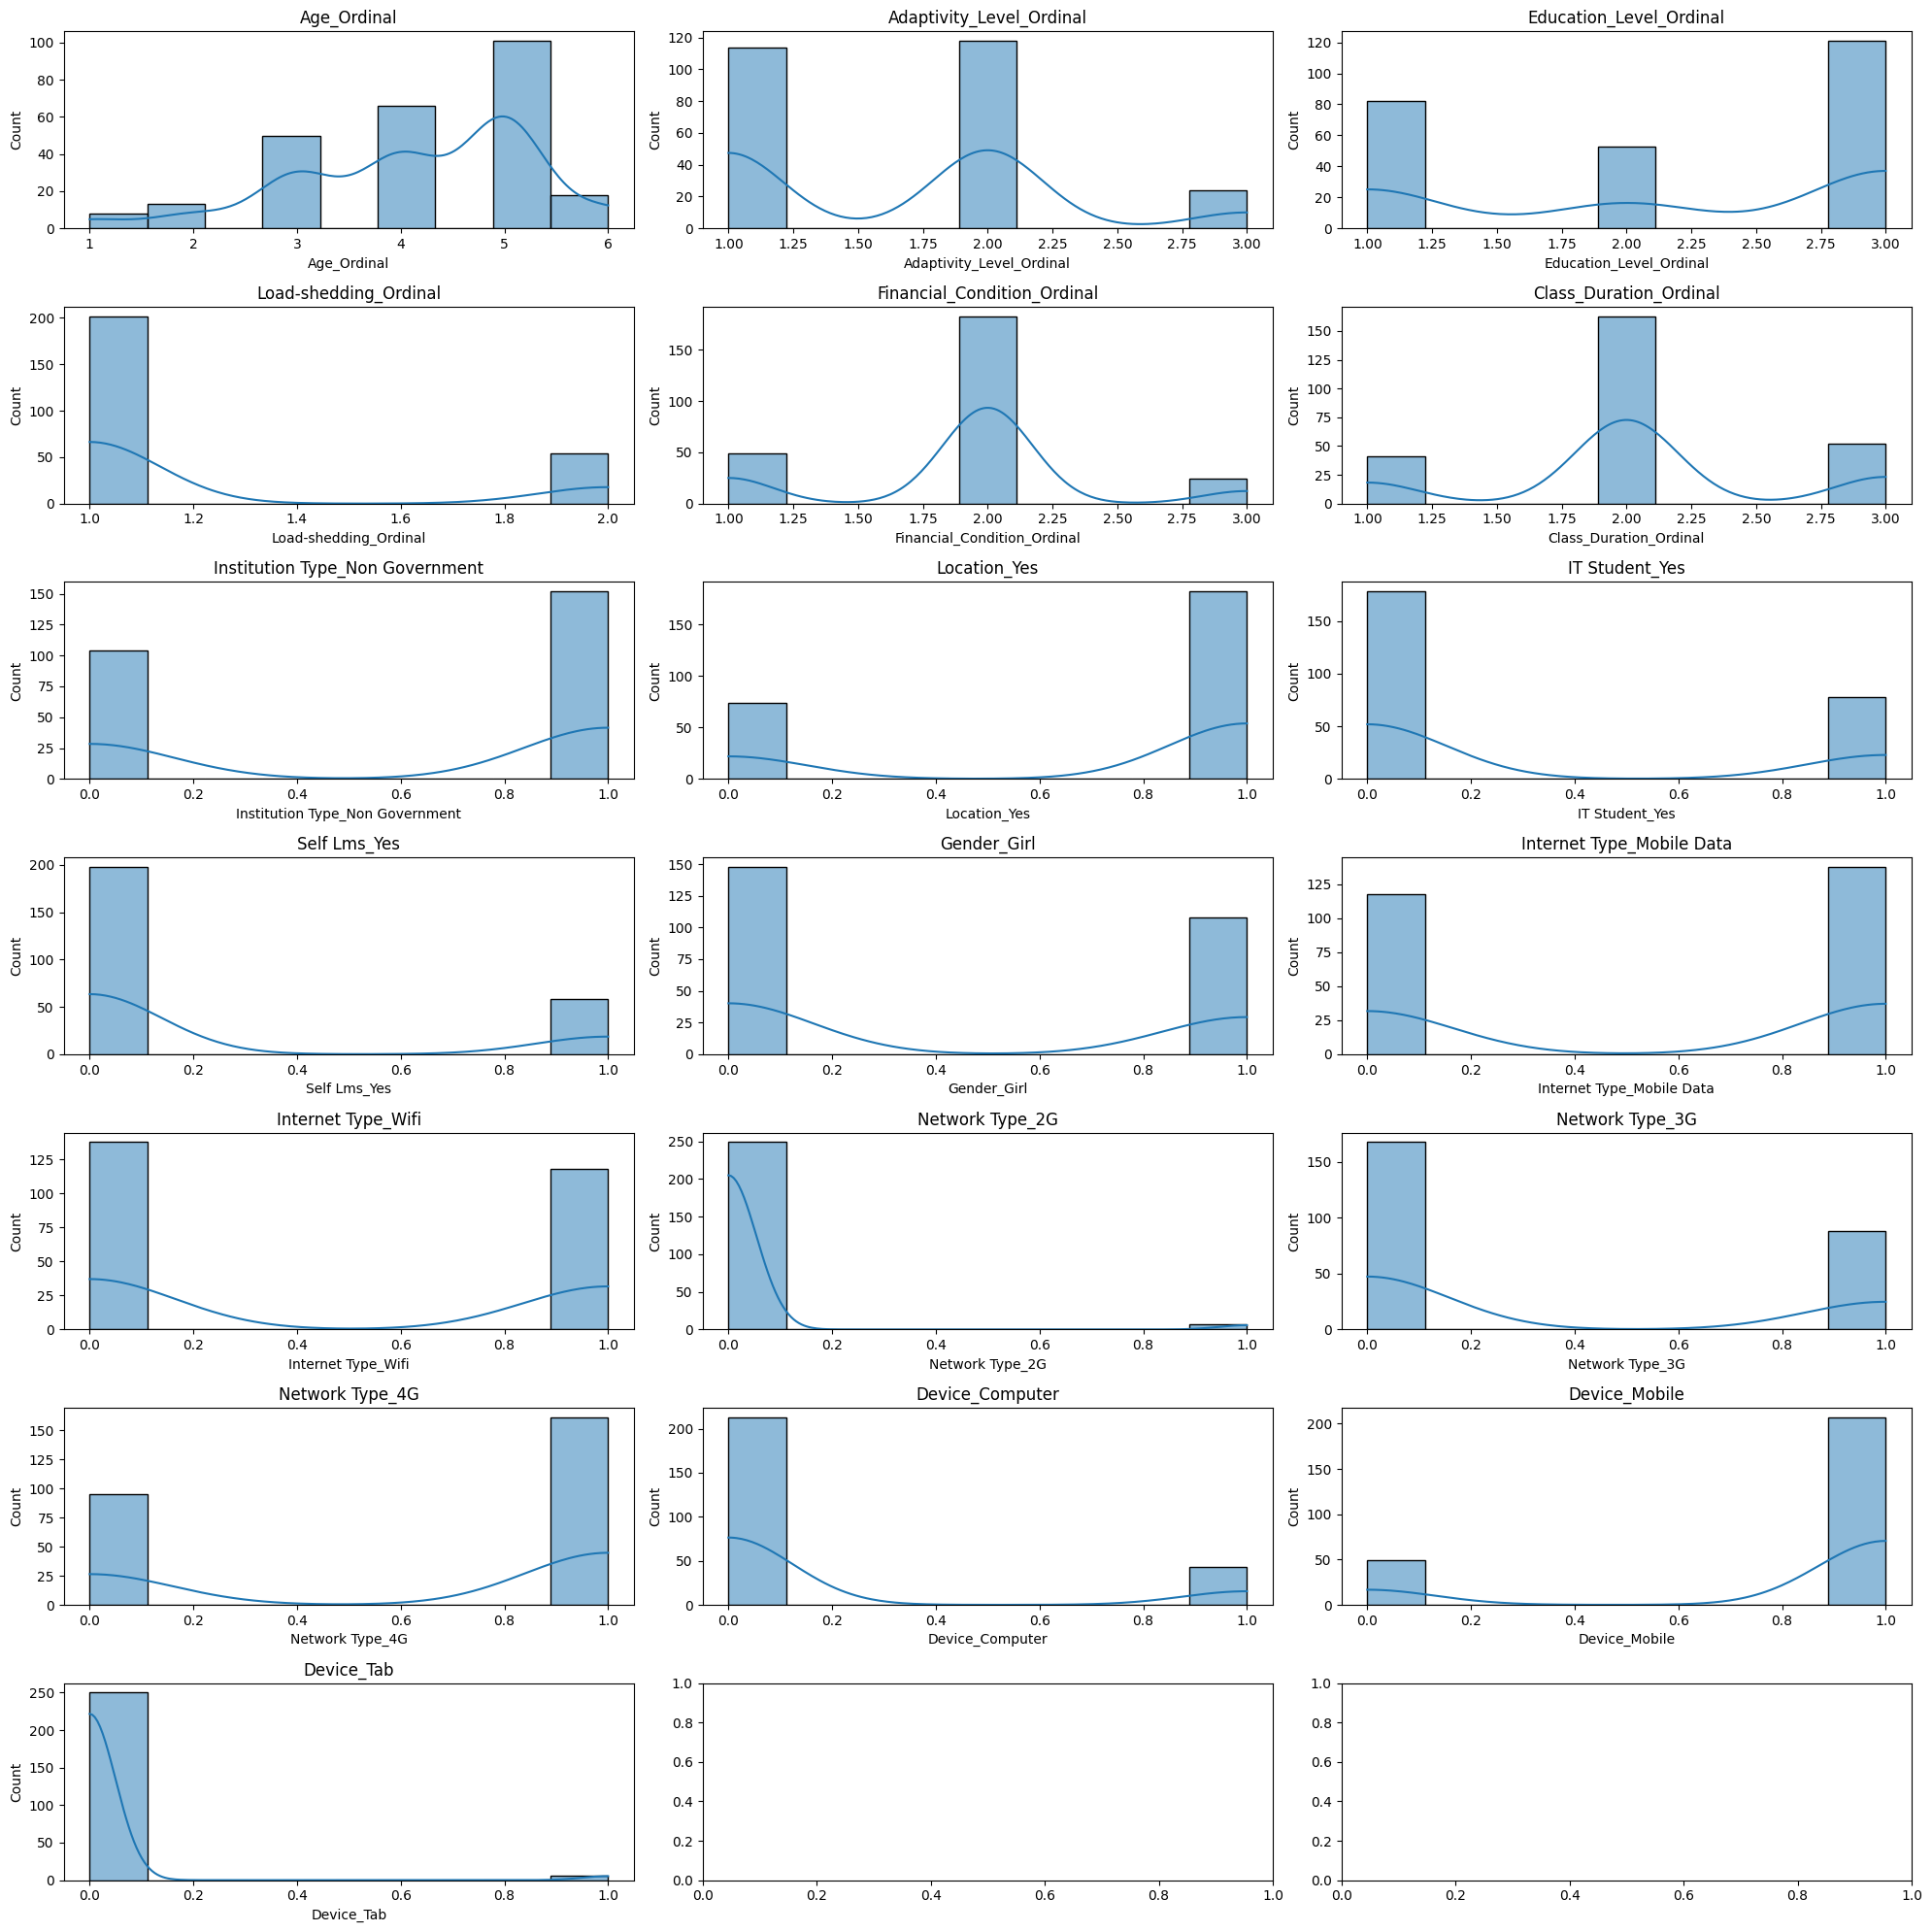

In [64]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20, 20))
columns = df_encoded.columns
index = 0

for i in range(7):
    for j in range(3):
        if index < len(columns):
            sns.histplot(df_encoded[columns[index]], kde=True, ax=axes[i, j])
            axes[i, j].set_title(columns[index])
            index += 1

plt.tight_layout()
plt.show()

# Machine Learning Algorithms

Use KNN and Decision tree and find which one is working better.

### Define X and Y

In [65]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X = df_encoded.drop('Adaptivity_Level_Ordinal', axis=1)
y = df_encoded['Adaptivity_Level_Ordinal']

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age_Ordinal                      256 non-null    int64  
 1   Education_Level_Ordinal          256 non-null    int64  
 2   Load-shedding_Ordinal            256 non-null    int64  
 3   Financial_Condition_Ordinal      256 non-null    int64  
 4   Class_Duration_Ordinal           256 non-null    int64  
 5   Institution Type_Non Government  256 non-null    bool   
 6   Location_Yes                     256 non-null    bool   
 7   IT Student_Yes                   256 non-null    bool   
 8   Self Lms_Yes                     256 non-null    bool   
 9   Gender_Girl                      256 non-null    bool   
 10  Internet Type_Mobile Data        256 non-null    float64
 11  Internet Type_Wifi               256 non-null    float64
 12  Network Type_2G       

### Feature Scaling

Feature scaling is not required because categorical variables represent qualitative data rather than quantitative data

### Train Test Split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to apply KNN and evaluate
def evaluate_knn(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

#### Check different distance metric

**Euclidean**

In [76]:
# Applying KNN with Euclidean distance
euclidean_accuracy, euclidean_report = evaluate_knn(9, 'euclidean', X_train_scaled, y_train, X_test_scaled, y_test)
print("Euclidean Accuracy:", euclidean_accuracy)
print("Euclidean Report:\n", euclidean_report)

Euclidean Accuracy: 0.6346153846153846
Euclidean Report:
               precision    recall  f1-score   support

           1       0.54      0.75      0.62        20
           2       0.75      0.60      0.67        30
           3       0.00      0.00      0.00         2

    accuracy                           0.63        52
   macro avg       0.43      0.45      0.43        52
weighted avg       0.64      0.63      0.62        52



In [87]:
# Applying KNN with Euclidean distance
euclidean_accuracy, euclidean_report = evaluate_knn(17, 'euclidean', X_train_scaled, y_train, X_test_scaled, y_test)

print("Euclidean Accuracy:", euclidean_accuracy)
print("Euclidean Report:\n", euclidean_report)

Euclidean Accuracy: 0.6346153846153846
Euclidean Report:
               precision    recall  f1-score   support

           1       0.54      0.65      0.59        20
           2       0.71      0.67      0.69        30
           3       0.00      0.00      0.00         2

    accuracy                           0.63        52
   macro avg       0.42      0.44      0.43        52
weighted avg       0.62      0.63      0.63        52



With 17 nearest neighbours, this model is giving max accuracy

**Manhattan**

In [88]:
# Applying KNN with Manhattan distance
manhattan_accuracy, manhattan_report = evaluate_knn(9, 'manhattan', X_train_scaled, y_train, X_test_scaled, y_test)

print("Manhattan Accuracy:", manhattan_accuracy)
print("Manhattan Report:\n", manhattan_report)

Manhattan Accuracy: 0.5961538461538461
Manhattan Report:
               precision    recall  f1-score   support

           1       0.48      0.65      0.55        20
           2       0.75      0.60      0.67        30
           3       0.00      0.00      0.00         2

    accuracy                           0.60        52
   macro avg       0.41      0.42      0.41        52
weighted avg       0.62      0.60      0.60        52



In [93]:
# Applying KNN with Manhattan distance
manhattan_accuracy, manhattan_report = evaluate_knn(17, 'manhattan', X_train_scaled, y_train, X_test_scaled, y_test)

print("Manhattan Accuracy:", manhattan_accuracy)
print("Manhattan Report:\n", manhattan_report)

Manhattan Accuracy: 0.6538461538461539
Manhattan Report:
               precision    recall  f1-score   support

           1       0.56      0.75      0.64        20
           2       0.76      0.63      0.69        30
           3       0.00      0.00      0.00         2

    accuracy                           0.65        52
   macro avg       0.44      0.46      0.44        52
weighted avg       0.65      0.65      0.64        52



# Decision Tree

**Using Entropy**

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [100]:
# Initializing and training the Decision Tree Classifier with Gini impurity
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

**Use Gini Index**

In [101]:
# Initializing and training the Decision Tree Classifier with Gini impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [102]:
# Making predictions and evaluating the models
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_gini, accuracy_entropy

(0.46153846153846156, 0.36538461538461536)

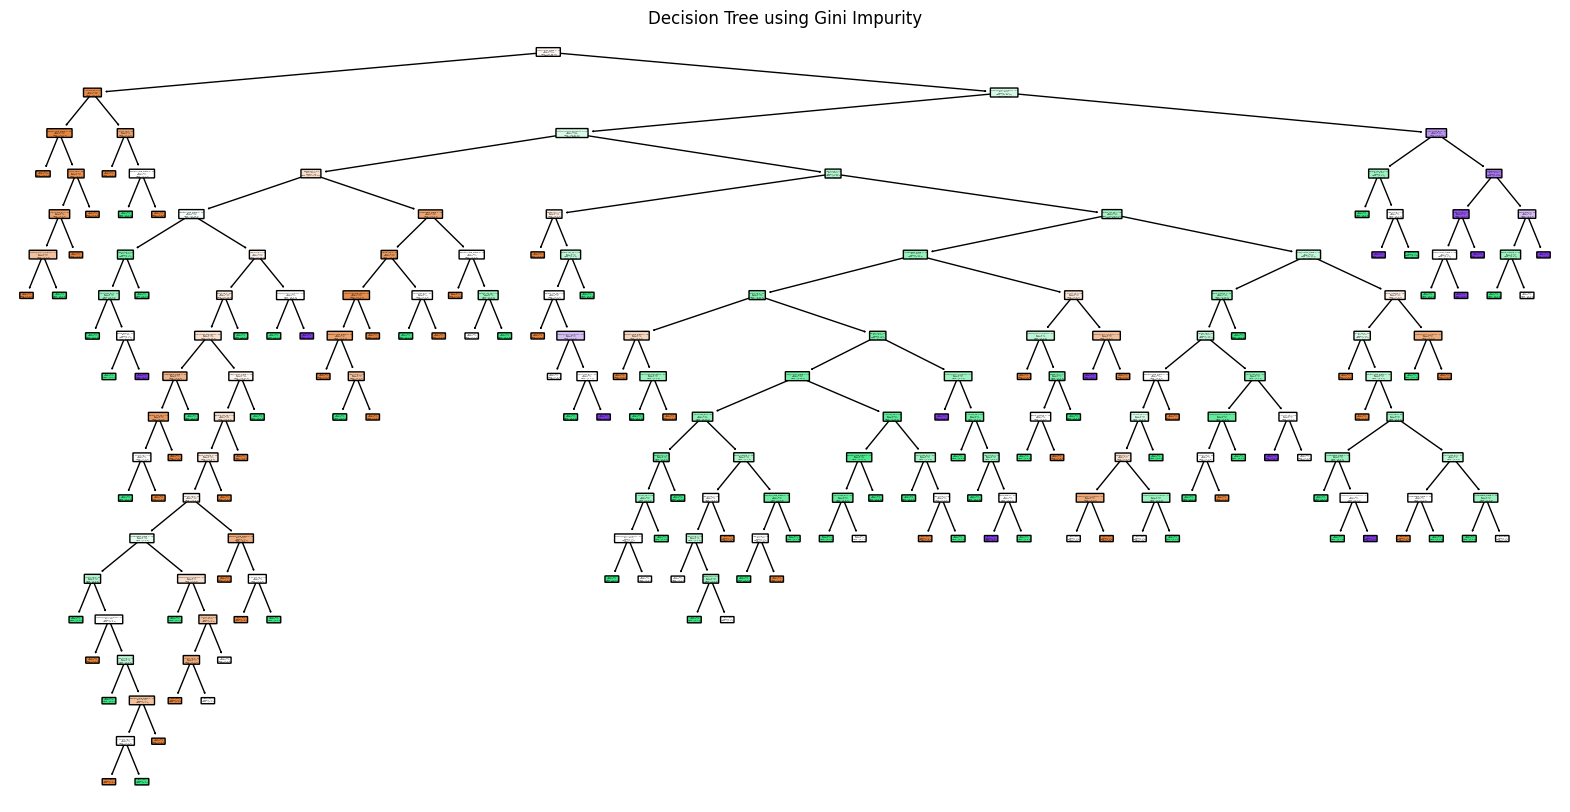

In [103]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Visualizing the Decision Tree using Gini impurity
plt.figure(figsize=(20,10))
plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=['Low', 'Moderate','High'], rounded=True)
plt.title("Decision Tree using Gini Impurity")
plt.show()
plt.close()

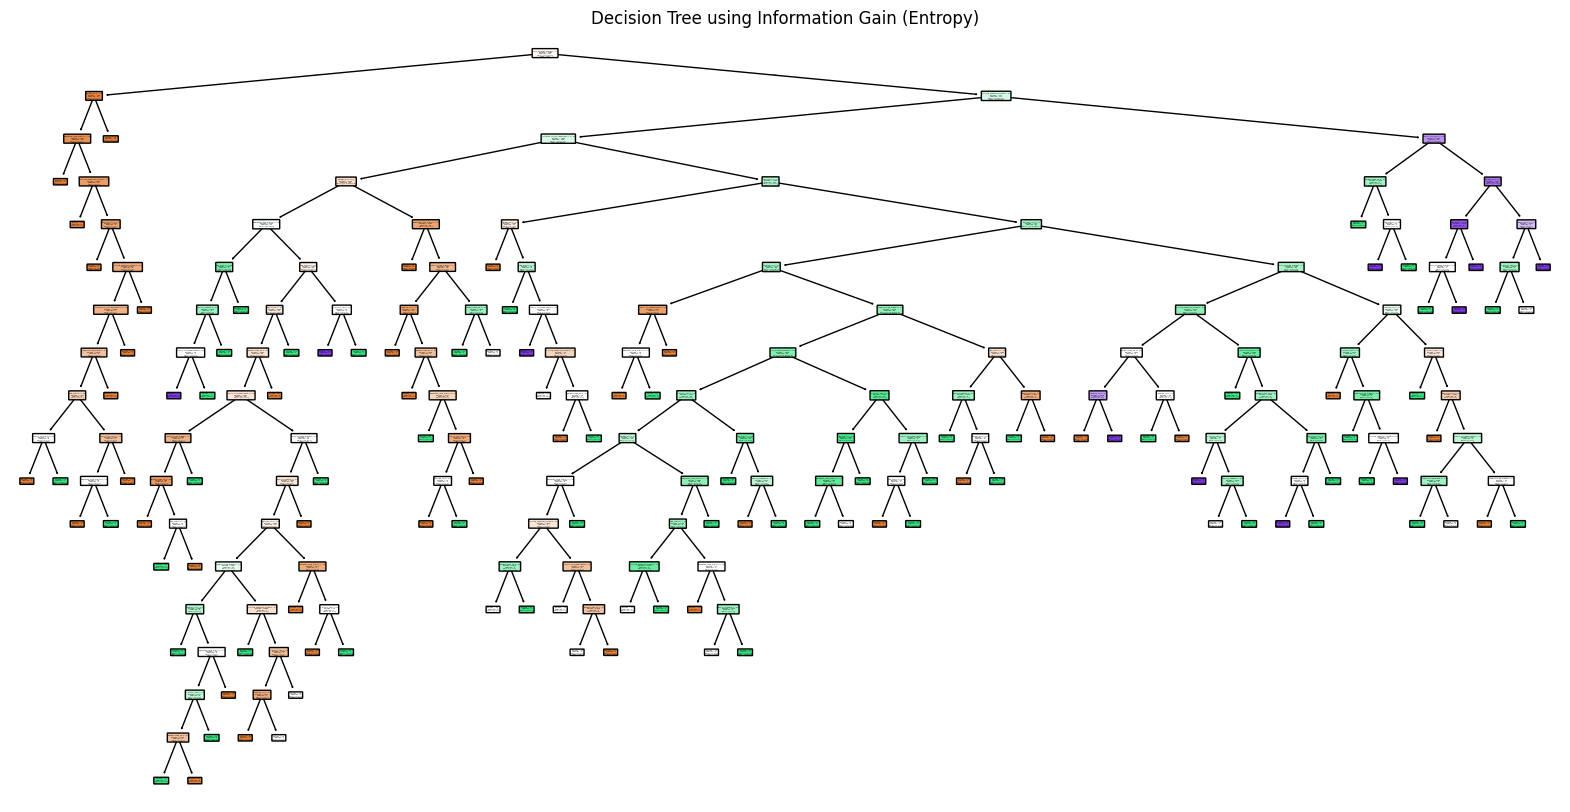

In [104]:
# Visualizing the Decision Tree using Information Gain (Entropy)
plt.figure(figsize=(20,10))
plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=['Low', 'Moderate','High'], rounded=True)
plt.title("Decision Tree using Information Gain (Entropy)")
plt.show()
plt.close()

The Decision Tree models have been successfully applied to dataset using both Gini impurity and Information Gain (Entropy) as criteria. Here are the results:

Decision Tree with Gini Impurity Criterion:
Accuracy on the test set: Approximately 46.15%

Decision Tree with Information Gain (Entropy) Criterion:
Accuracy on the test set: Approximately 36.53%